In [130]:
import warnings
warnings.filterwarnings("ignore")

import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
from cycler import cycler


import json
import csv
import pandas as pd
import numpy as np

import networkx as nx

In [131]:
#rcParams default settings
"https://matplotlib.org/stable/tutorials/introductory/customizing.html"

#rcParams settings
plt.style.use('ggplot')

rcParams['font.family'] = 'sans-serif'
rcParams['font.style'] = 'normal'

rcParams['figure.facecolor'] = 'white'

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = True

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 20
rcParams['axes.labelcolor'] = 'black'
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlepad'] = 4

rcParams['xtick.color'] = 'grey'
rcParams['ytick.color'] = 'grey'
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 0
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 0

rcParams['lines.linewidth'] = 3
rcParams['lines.markersize'] = 10

rcParams['grid.color'] = 'grey'
rcParams['grid.linewidth'] = 0.1

In [132]:
df = pd.read_csv("data.csv", index_col=[0])

In [133]:
df.head()

,attachments,author_id,created_at,edit_history_tweet_ids,entities,id,lang,public_metrics,text,username,...,annotations_probability,annotations_start,annotations_type,urls_display_url,urls_end,urls_expanded_url,urls_start,urls_status,urls_unwound_url,urls_url
0,{'media_keys': ['13_1610292861630840833']},51801586,2023-01-03T15:18:41.000Z,['1610294585242300416'],"{'annotations': [{'end': 6, 'normalized_text': 'ABB', 'probability': 0.5031, 'start': 4, 'type': 'Other'}, {'end': 137, 'normalized_text': 'ABB', 'probability': 0.563, 'start': 135, 'type': 'Other'}], 'hashtags': [{'end': 138, 'start': 134, 'tag': 'ABB'}, {'end': 156, 'start': 139, 'tag': 'electricvehicles'}, {'end': 167, 'start': 157, 'tag': 'emobility'}, {'end': 183, 'start': 168, 'tag': 'sustainability'}], 'urls': [{'display_url': 'social.abb/e-mobility-hom…', 'end': 132, 'expanded_url': 'https://social.abb/e-mobility-home-charging-solution', 'start': 109, 'url': 'https://t.co/SxPrbxo5DB'}, {'display_url': 'pic.twitter.com/aY28Cs6aQY', 'end': 207, 'expanded_url': 'https://twitter.com/ABBgroupnews/status/1610294585242300416/video/1', 'media_key': '13_1610292861630840833', 'start': 184, 'url': 'https://t.co/aY28Cs6aQY'}]}",1610294585242300416,en,"{'bookmark_count': 0, 'impression_count': 3864, 'like_count': 19, 'quote_count': 2, 'reply_count': 0, 'retweet_count': 7}",New ABB E-mobility home charging solution helps drivers realize their sustainable mobility goals.\r\nRead more: https://t.co/SxPrbxo5DB\r\n\r\n#ABB #electricvehicles #emobility #sustainability https://t.co/aY28Cs6aQY,abbgroupnews,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'media_keys': ['3_1612750081463095296']},51801586,2023-01-10T09:57:29.000Z,['1612750467859378178'],"{'annotations': [{'end': 2, 'normalized_text': 'ABB', 'probability': 0.6395, 'start': 0, 'type': 'Other'}, {'end': 67, 'normalized_text': 'Formula E', 'probability': 0.6289, 'start': 59, 'type': 'Other'}, {'end': 86, 'normalized_text': 'ABB Ability™', 'probability': 0.7036, 'start': 75, 'type': 'Other'}, {'end': 95, 'normalized_text': 'OPTIMAX®', 'probability': 0.6324, 'start': 88, 'type': 'Other'}, {'end': 208, 'normalized_text': 'ABBFormulaE', 'probability': 0.7369, 'start': 198, 'type': 'Other'}, {'end': 220, 'normalized_text': 'Motorsport', 'probability': 0.6179, 'start': 211, 'type': 'Other'}], 'hashtags': [{'end': 15, 'start': 4, 'tag': 'technology'}, {'end': 47, 'start': 30, 'tag': 'energyefficiency'}, {'end': 124, 'start': 115, 'tag': 'software'}, {'end': 209, 'start': 197, 'tag': 'ABBFormulaE'}, {'end': 221, 'start': 210, 'tag': 'Motorsport'}], 'urls': [{'display_url': 'social.abb/technology-ene…', 'end': 196, 'expanded_url': 'https://social.abb/technology-energy-efficiency-formula-e', 'start': 173, 'url': 'https://t.co/MwE3mzSgqT'}, {'display_url': 'pic.twitter.com/cYRvPaNcPV', 'end': 245, 'expanded_url': 'https://twitter.com/ABBgroupnews/status/1612750467859378178/photo/1', 'media_key': '3_1612750081463095296', 'start': 222, 'url': 'https://t.co/cYRvPaNcPV'}]}",1612750467859378178,en,"{'bookmark_count': 0, 'impression_count': 4887, 'like_count': 11, 'quote_count': 2, 'reply_count': 0, 'retweet_count': 4}",ABB #technology to facilitate #energyefficiency savings in Formula E. ⚡️🏎️\r\nABB Ability™ OPTIMAX® energy management #software to be fully implemented in Season 9.\r\nRead more: https://t.co/MwE3mzSgqT\r\n#ABBFormulaE #Motorsport https://t.co/cYRvPaNcPV,abbgroupnews,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'media_keys': ['13_1613112174939103235']},51801586,2023-01-11T10:01:06.000Z,['1613113765595320321'],"{'annotations': [{'end': 51, 'normalized_text': 'ABB', 'probability': 0.6157, 'start': 49, 'type': 'Other'}, {'end': 83, 'normalized_text': 'Kangsheng', 'probability': 0.4403, 'start': 75, 'type': 'Other'}, {'end': 166, 'normalized_text': 'ABB_Ability', 'probability': 0.752, 'start': 156, 'type': 'Other'}], 'hashtags': [{'end': 52, 'start': 48, 'tag': 'ABB'}, {'end': 99, 'start': 94, 'tag': 'data'}, {'end': 154, 'star

In [134]:
# Function to capitalize and replace specific usernames
def format_username(username):
    # Dictionary for specific replacements
    specific_replacements = {
        'lego_group': 'Lego Group',
        'hm': 'H&M',
        'detushepostdhl': 'DHL',
        'iberdrola_en': 'Iberdrola'
    }
    # Apply specific replacements if available
    if username in specific_replacements:
        return specific_replacements[username]
    # General case for handling 'group'
    if 'group' in username.lower():
        parts = username.split('group')
        return ' '.join([part.capitalize() for part in parts if part]) + ' Group'
    # Capitalize other usernames
    return username.capitalize()

df.username = df.username.apply(lambda x: format_username(x))

df.head()

,attachments,author_id,created_at,edit_history_tweet_ids,entities,id,lang,public_metrics,text,username,...,annotations_probability,annotations_start,annotations_type,urls_display_url,urls_end,urls_expanded_url,urls_start,urls_status,urls_unwound_url,urls_url
0,{'media_keys': ['13_1610292861630840833']},51801586,2023-01-03T15:18:41.000Z,['1610294585242300416'],"{'annotations': [{'end': 6, 'normalized_text': 'ABB', 'probability': 0.5031, 'start': 4, 'type': 'Other'}, {'end': 137, 'normalized_text': 'ABB', 'probability': 0.563, 'start': 135, 'type': 'Other'}], 'hashtags': [{'end': 138, 'start': 134, 'tag': 'ABB'}, {'end': 156, 'start': 139, 'tag': 'electricvehicles'}, {'end': 167, 'start': 157, 'tag': 'emobility'}, {'end': 183, 'start': 168, 'tag': 'sustainability'}], 'urls': [{'display_url': 'social.abb/e-mobility-hom…', 'end': 132, 'expanded_url': 'https://social.abb/e-mobility-home-charging-solution', 'start': 109, 'url': 'https://t.co/SxPrbxo5DB'}, {'display_url': 'pic.twitter.com/aY28Cs6aQY', 'end': 207, 'expanded_url': 'https://twitter.com/ABBgroupnews/status/1610294585242300416/video/1', 'media_key': '13_1610292861630840833', 'start': 184, 'url': 'https://t.co/aY28Cs6aQY'}]}",1610294585242300416,en,"{'bookmark_count': 0, 'impression_count': 3864, 'like_count': 19, 'quote_count': 2, 'reply_count': 0, 'retweet_count': 7}",New ABB E-mobility home charging solution helps drivers realize their sustainable mobility goals.\r\nRead more: https://t.co/SxPrbxo5DB\r\n\r\n#ABB #electricvehicles #emobility #sustainability https://t.co/aY28Cs6aQY,Abb News Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'media_keys': ['3_1612750081463095296']},51801586,2023-01-10T09:57:29.000Z,['1612750467859378178'],"{'annotations': [{'end': 2, 'normalized_text': 'ABB', 'probability': 0.6395, 'start': 0, 'type': 'Other'}, {'end': 67, 'normalized_text': 'Formula E', 'probability': 0.6289, 'start': 59, 'type': 'Other'}, {'end': 86, 'normalized_text': 'ABB Ability™', 'probability': 0.7036, 'start': 75, 'type': 'Other'}, {'end': 95, 'normalized_text': 'OPTIMAX®', 'probability': 0.6324, 'start': 88, 'type': 'Other'}, {'end': 208, 'normalized_text': 'ABBFormulaE', 'probability': 0.7369, 'start': 198, 'type': 'Other'}, {'end': 220, 'normalized_text': 'Motorsport', 'probability': 0.6179, 'start': 211, 'type': 'Other'}], 'hashtags': [{'end': 15, 'start': 4, 'tag': 'technology'}, {'end': 47, 'start': 30, 'tag': 'energyefficiency'}, {'end': 124, 'start': 115, 'tag': 'software'}, {'end': 209, 'start': 197, 'tag': 'ABBFormulaE'}, {'end': 221, 'start': 210, 'tag': 'Motorsport'}], 'urls': [{'display_url': 'social.abb/technology-ene…', 'end': 196, 'expanded_url': 'https://social.abb/technology-energy-efficiency-formula-e', 'start': 173, 'url': 'https://t.co/MwE3mzSgqT'}, {'display_url': 'pic.twitter.com/cYRvPaNcPV', 'end': 245, 'expanded_url': 'https://twitter.com/ABBgroupnews/status/1612750467859378178/photo/1', 'media_key': '3_1612750081463095296', 'start': 222, 'url': 'https://t.co/cYRvPaNcPV'}]}",1612750467859378178,en,"{'bookmark_count': 0, 'impression_count': 4887, 'like_count': 11, 'quote_count': 2, 'reply_count': 0, 'retweet_count': 4}",ABB #technology to facilitate #energyefficiency savings in Formula E. ⚡️🏎️\r\nABB Ability™ OPTIMAX® energy management #software to be fully implemented in Season 9.\r\nRead more: https://t.co/MwE3mzSgqT\r\n#ABBFormulaE #Motorsport https://t.co/cYRvPaNcPV,Abb News Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'media_keys': ['13_1613112174939103235']},51801586,2023-01-11T10:01:06.000Z,['1613113765595320321'],"{'annotations': [{'end': 51, 'normalized_text': 'ABB', 'probability': 0.6157, 'start': 49, 'type': 'Other'}, {'end': 83, 'normalized_text': 'Kangsheng', 'probability': 0.4403, 'start': 75, 'type': 'Other'}, {'end': 166, 'normalized_text': 'ABB_Ability', 'probability': 0.752, 'start': 156, 'type': 'Other'}], 'hashtags': [{'end': 52, 'start': 48, 'tag': 'ABB'}, {'end': 99, 'start': 94, 'tag': 'data'}, {'end': 154, '

In [135]:
texts_df = df[['username', 'created_at', 'text', 'lang']]

# Activity over time analysis

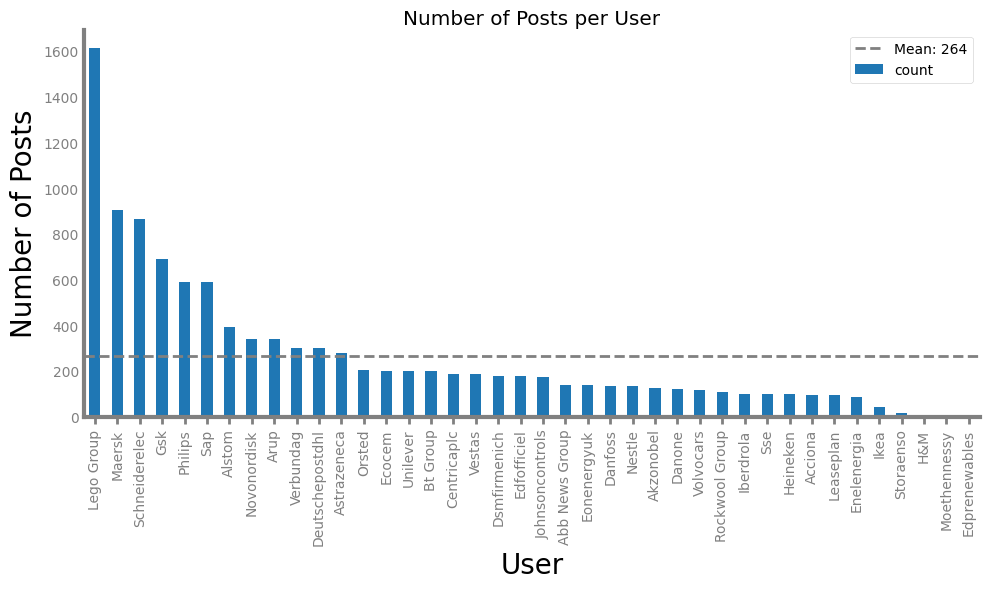

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute the number of total tweets per username/user_id
tweet_counts = df['username'].value_counts()

# Calculate the average number of posts
average_posts = tweet_counts.mean()

# Plot the results using a bar chart
plt.figure(figsize=(10, 6))
tweet_counts.plot(kind='bar', color='tab:blue')
plt.axhline(y=average_posts, color='grey', linestyle='--', linewidth=2, label=f'Mean: {average_posts:.0f}')
plt.title('Number of Posts per User')
plt.xlabel('User')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)  # Apply formatted labels
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [138]:
df['date'] = pd.to_datetime(df['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [139]:
# Identify the first and last post dates for each user
first_last_posts = df.groupby('username')['date'].agg(['min', 'max'])
first_last_posts = first_last_posts[(first_last_posts['min'].dt.month == 1) & (first_last_posts['max'].dt.month == 12)]

# Filter the original DataFrame to include only users who meet the criteria
filtered_df = df[df['username'].isin(first_last_posts.index)]

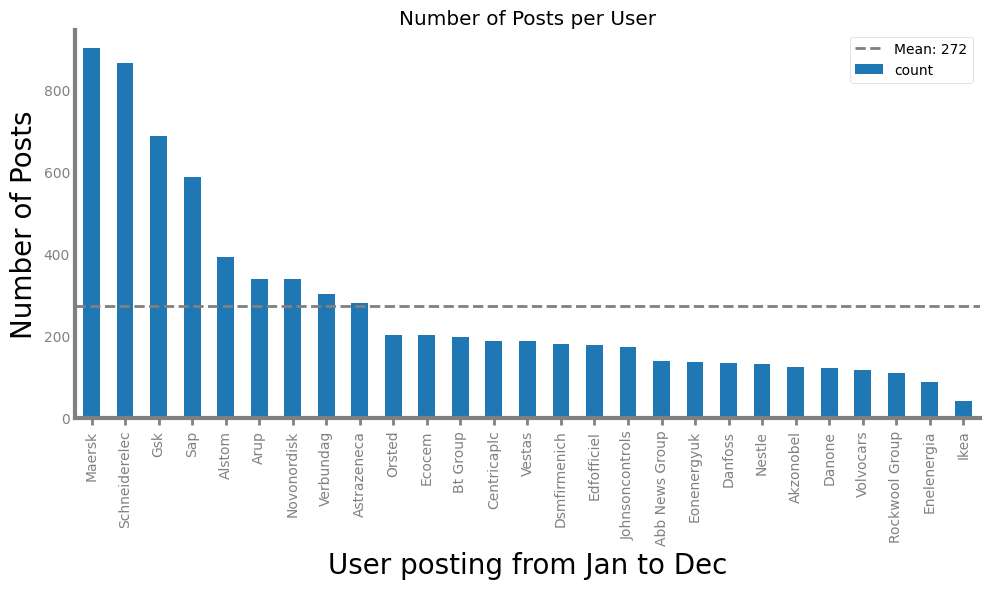

In [140]:
# Compute the number of total tweets per username/user_id
tweet_counts = filtered_df['username'].value_counts()

# Calculate the average number of posts
average_posts = tweet_counts.mean()

# Plot the results using a bar chart
plt.figure(figsize=(10, 6))
tweet_counts.plot(kind='bar', color='tab:blue')
plt.axhline(y=average_posts, color='grey', linestyle='--', linewidth=2, label=f'Mean: {average_posts:.0f}')
plt.title('Number of Posts per User')
plt.xlabel('User posting from Jan to Dec')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)  # Apply formatted labels
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [141]:
print(min(df.loc[df.username == 'Lego Group'].created_at))
print(max(df.loc[df.username == 'Lego Group'].created_at))

2023-08-06T09:07:42.000Z
2023-12-31T12:00:57.000Z


#### Daily tweet distribution

In [142]:
tweet_counts = filtered_df['username'].value_counts()
tweet_counts.index.to_list()

['Maersk',
 'Schneiderelec',
 'Gsk',
 'Sap',
 'Alstom',
 'Arup',
 'Novonordisk',
 'Verbundag',
 'Astrazeneca',
 'Orsted',
 'Ecocem',
 'Bt Group',
 'Centricaplc',
 'Vestas',
 'Dsmfirmenich',
 'Edfofficiel',
 'Johnsoncontrols',
 'Abb News Group',
 'Eonenergyuk',
 'Danfoss',
 'Nestle',
 'Akzonobel',
 'Danone',
 'Volvocars',
 'Rockwool Group',
 'Enelenergia',
 'Ikea']

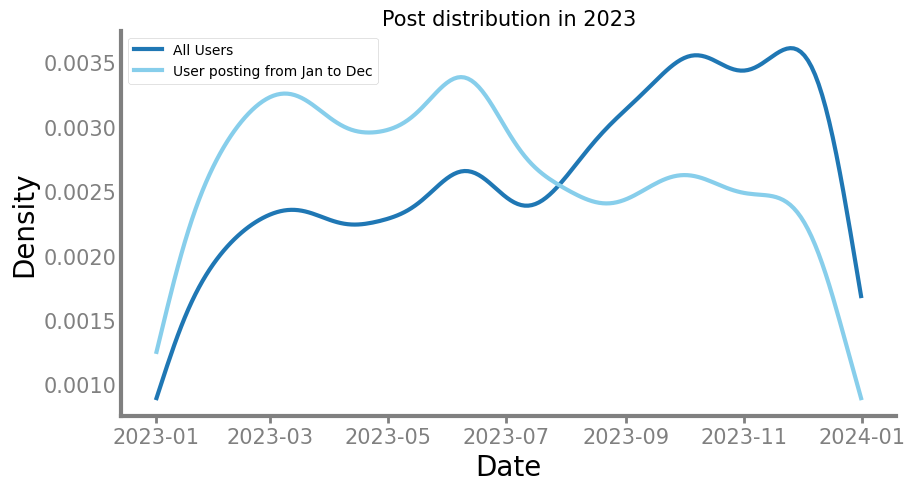

In [143]:
_, ax = plt.subplots(figsize=(10, 5))

# Create the KDE plot without the legend
sns.kdeplot(data=df, x="date", cut=0, ax = ax, color='tab:blue', label='All Users')
sns.kdeplot(data=filtered_df, x="date", cut=0, ax = ax, color='skyblue', label='User posting from Jan to Dec')

# Set x and y tick labels font size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Set x-axis label and its font size
plt.xlabel('Date')
plt.title('Post distribution in 2023', fontsize=15)
plt.legend()
plt.grid(False)

# Show the plot
plt.show()

Alstom

In [166]:
tmp = df.loc[df.username == 'Alstom']\
    # .loc[df.date > datetime.datetime(2023,6,1)]\
    # .loc[df.date < datetime.datetime(2023, 7, 1)]

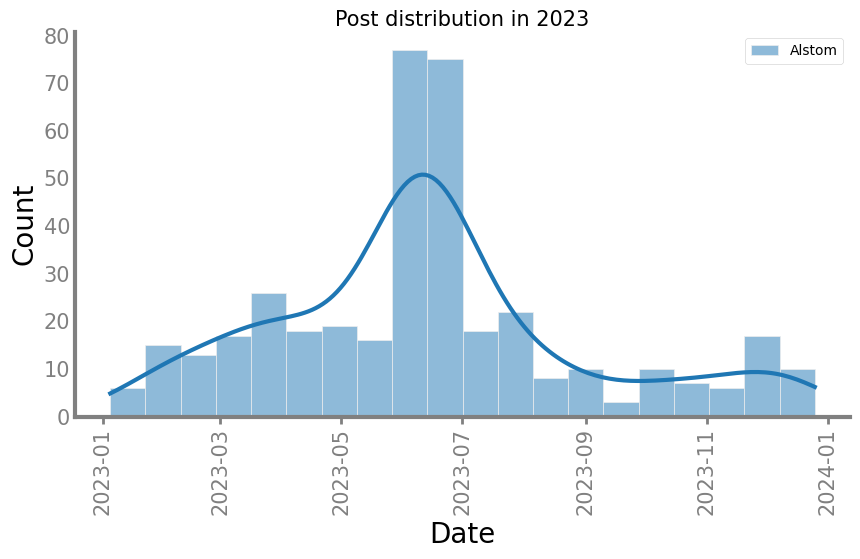

In [167]:
_, ax = plt.subplots(figsize=(10, 5))


# Create the KDE plot without the legend
sns.histplot(data=tmp, x="date", ax = ax, color='tab:blue', bins=20, kde=True, label='Alstom', kde_kws={'cut':0})

# Set x and y tick labels font size
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)

# Set x-axis label and its font size
plt.xlabel('Date')
plt.title('Post distribution in 2023', fontsize=15)
plt.legend()
plt.grid(False)

# Show the plot
plt.show()

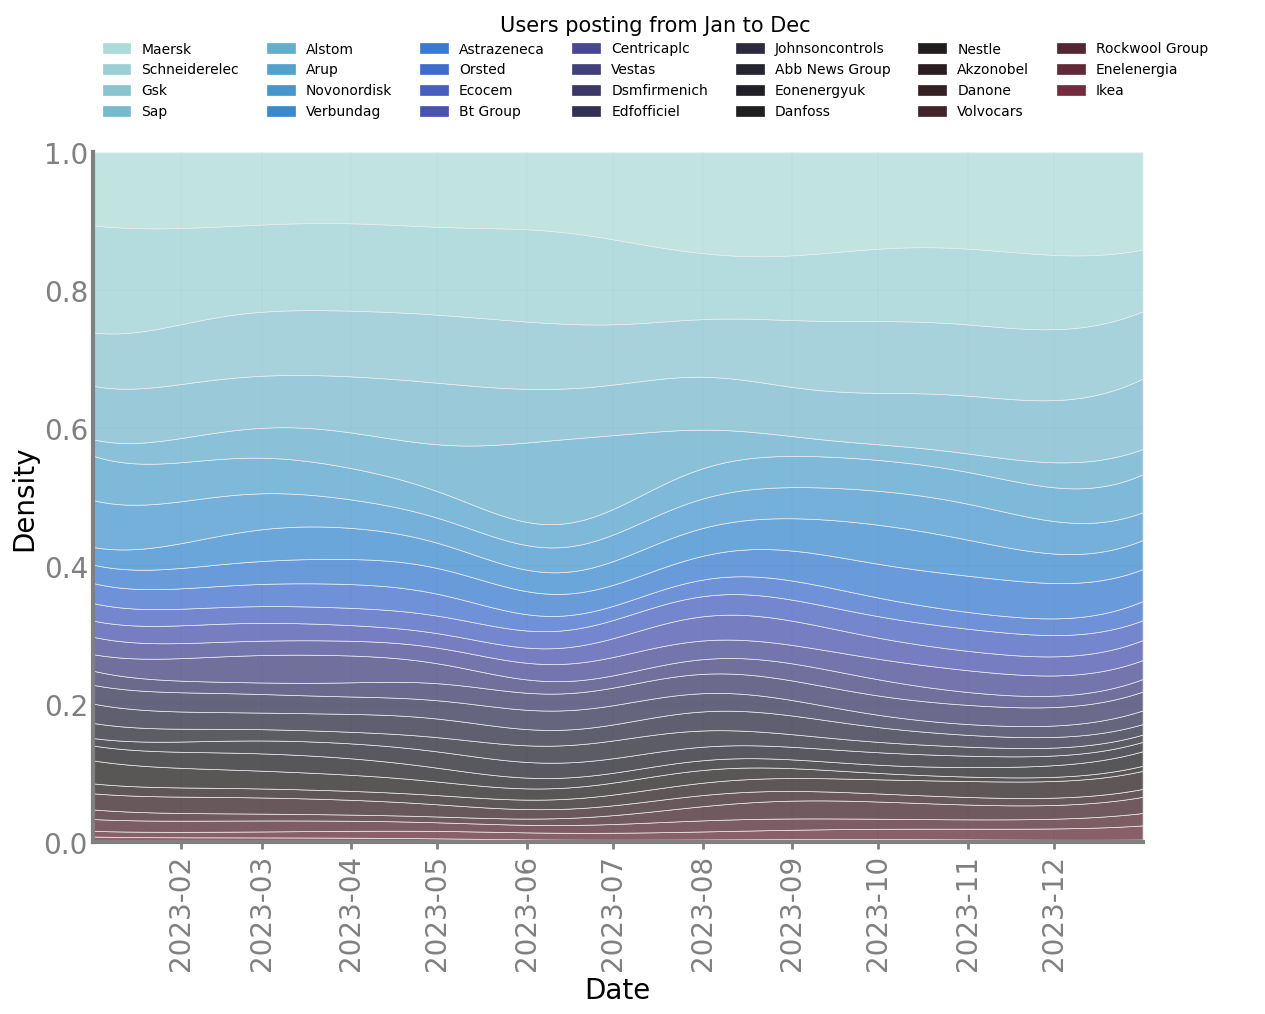

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Set the palette
palette = sns.color_palette("icefire", n_colors=len(df.username.unique()))
sns.set_palette(palette)

_, ax = plt.subplots(ncols=2, figsize=(15, 10), width_ratios=(30,0.2))

tweet_counts = filtered_df['username'].value_counts()
sorted_usernames = tweet_counts.index.to_list()

# Create the KDE plot without the legend
g = sns.kdeplot(data=filtered_df, x="date", hue="username",  hue_order = sorted_usernames, multiple='fill', legend=False, cut=0, ax=ax[0])


# Set x and y tick labels font size
ax[0].set_xticks(ticks=ax[0].get_xticks(), labels = ax[0].get_xticklabels(), fontsize=20, rotation=90)
ax[0].set_yticks(ticks=ax[0].get_yticks(),  labels = ax[0].get_yticklabels(), fontsize=20)

# Set x-axis label and its font size
ax[0].set_xlabel('Date')

# Create custom legend handles
handles = [Patch(color=palette[i], label=sorted_usernames[i]) for i in range(len(sorted_usernames))]
labels = sorted_usernames

# Calculate the number of columns based on figure size and number of unique usernames
fig = plt.gcf()
fig_width = fig.get_size_inches()[0]  # Width of the figure in inches
max_legend_columns = int(fig_width // 2)  # Adjust the divisor to control column width
n_columns = min(len(sorted_usernames), max_legend_columns)

# Adjust the subplot parameters to make room for the legend above the plot
plt.subplots_adjust(top=0.8)  # Increase top margin

# Create the legend
fig.legend(labels = labels, handles=handles, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=n_columns, frameon=False, title = 'Users posting from Jan to Dec', title_fontsize=15)

# ax[1].text(1.02, 0, 'less active', transform=ax[1].transAxes, verticalalignment='bottom', horizontalalignment='right')
ax[1].axis("off")

# Show the plot
plt.show()



['Abb News Group' 'Akzonobel' 'Alstom' 'Arup' 'Astrazeneca' 'Bt Group'
 'Centricaplc' 'Danfoss' 'Danone' 'Dsmfirmenich' 'Ecocem' 'Edfofficiel'
 'Enelenergia' 'Eonenergyuk' 'Gsk' 'Ikea' 'Johnsoncontrols' 'Maersk'
 'Nestle' 'Novonordisk' 'Orsted' 'Rockwool Group' 'Sap' 'Schneiderelec'
 'Verbundag' 'Vestas' 'Volvocars']


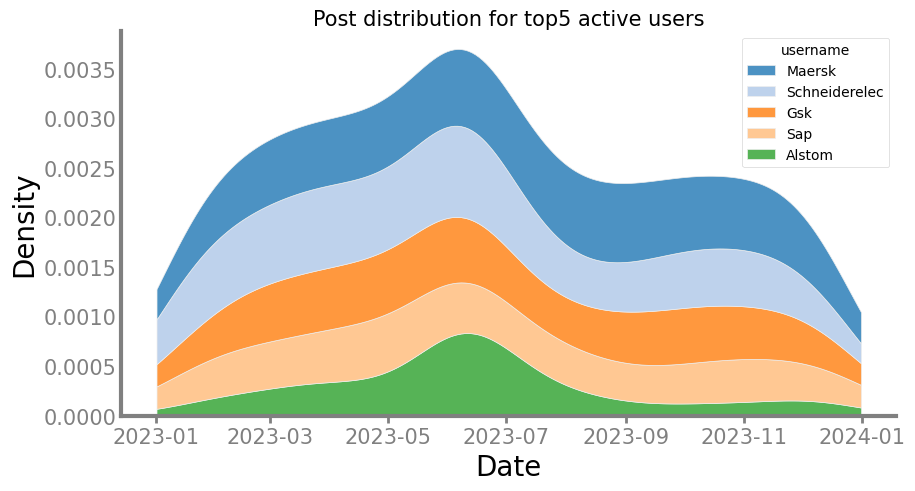

In [14]:
_, ax = plt.subplots(figsize=(10, 5))

palette = sns.color_palette("tab20", n_colors=20)
sns.set_palette(palette)

filtered_usernames = filtered_df.username.unique()

print(filtered_usernames)

tweet_counts = filtered_df['username'].value_counts()
sorted_usernames = tweet_counts.index.to_list()

sns.kdeplot(data=filtered_df.loc[filtered_df.username.isin(sorted_usernames[:5])], x="date", cut=0, ax = ax, hue='username', multiple='stack', alpha=0.8, legend=True, hue_order=sorted_usernames[:5])

# sns.kdeplot(data=filtered_df, x="date", cut=0, ax = ax, color='skyblue', label='User posting from Jan to Dec')

# Set x and y tick labels font size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Set x-axis label and its font size
plt.xlabel('Date')
plt.title('Post distribution for top5 active users', fontsize=15)
plt.grid(False)

# Show the plot
plt.show()

['Abb News Group' 'Akzonobel' 'Alstom' 'Arup' 'Astrazeneca' 'Bt Group'
 'Centricaplc' 'Danfoss' 'Danone' 'Dsmfirmenich' 'Ecocem' 'Edfofficiel'
 'Enelenergia' 'Eonenergyuk' 'Gsk' 'Ikea' 'Johnsoncontrols' 'Maersk'
 'Nestle' 'Novonordisk' 'Orsted' 'Rockwool Group' 'Sap' 'Schneiderelec'
 'Verbundag' 'Vestas' 'Volvocars']


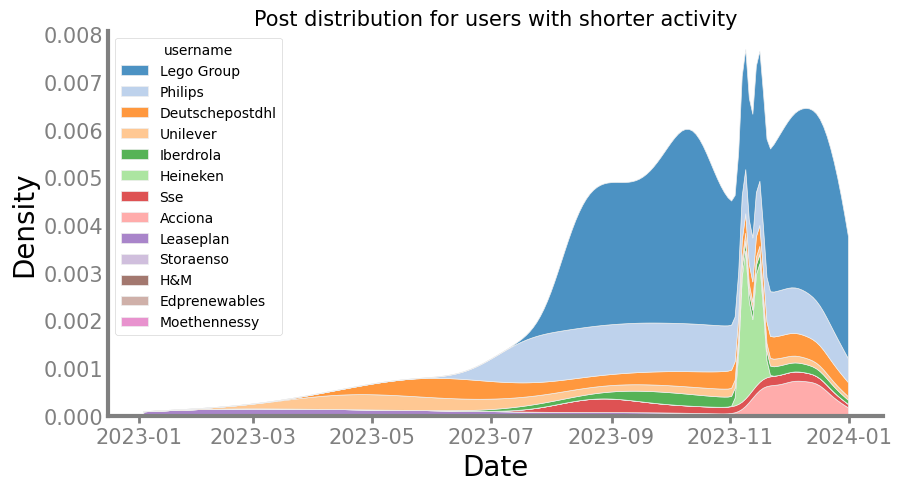

In [15]:
_, ax = plt.subplots(figsize=(10, 5))

palette = sns.color_palette("tab20", n_colors=20)
sns.set_palette(palette)

filtered_usernames = filtered_df.username.unique()

print(filtered_usernames)

unfiltered_df = df[~df['username'].isin(filtered_usernames)]


tweet_counts = unfiltered_df['username'].value_counts()
sorted_usernames = tweet_counts.index.to_list()

sns.kdeplot(data=unfiltered_df, x="date", cut=0, ax = ax, hue='username', multiple='stack', alpha=0.8, legend=True, hue_order=sorted_usernames)

# sns.kdeplot(data=filtered_df, x="date", cut=0, ax = ax, color='skyblue', label='User posting from Jan to Dec')

# Set x and y tick labels font size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Date')
plt.title('Post distribution for users with shorter activity', fontsize=15)
plt.grid(False)

# Show the plot
plt.show()

#### Weekly trends

In [16]:
filtered_df['week'] = filtered_df['date'].dt.isocalendar().week
df_plot = filtered_df.groupby(['week']).size()

In [17]:
df_plot

week
1     107
2     138
3     140
4     111
5     132
6     188
7     156
8     147
9     178
10    179
11    199
12    158
13    169
14    125
15    141
16    150
17    171
18    160
19    134
20    137
21    160
22    181
23    225
24    200
25    161
26    153
27    129
28    116
29    126
30    164
31    121
32    127
33    102
34    134
35    108
36    117
37    143
38    136
39    143
40    139
41    146
42    123
43    125
44    118
45    134
46    117
47    133
48    143
49    138
50     93
51    111
52     59
dtype: int64

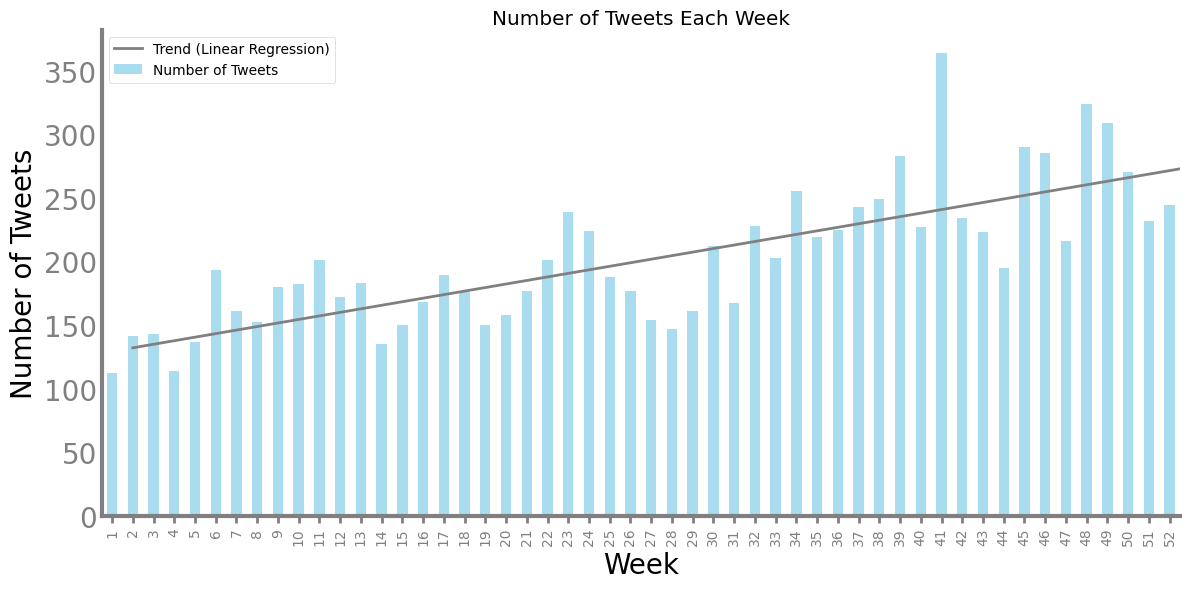

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'df' is already defined and 'date' column is in datetime format
df['week'] = df['date'].dt.isocalendar().week
tmp = df.loc[df.username != 'lego_group']
df_plot = tmp.groupby(['week']).size()

# Prepare data for linear regression
weeks = df_plot.index.to_numpy(dtype=int)  # Ensure weeks are integers
tweets = df_plot.values 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weeks, tweets)
regression_line = slope * weeks + intercept

# Plot the barplot
plt.figure(figsize=(12, 6))
df_plot.plot(kind='bar', color='skyblue', alpha=0.7, label='Number of Tweets')

# Plot the linear regression trend line
plt.plot(weeks, regression_line, color='grey', linewidth=2, label='Trend (Linear Regression)')

plt.title('Number of Tweets Each Week')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()


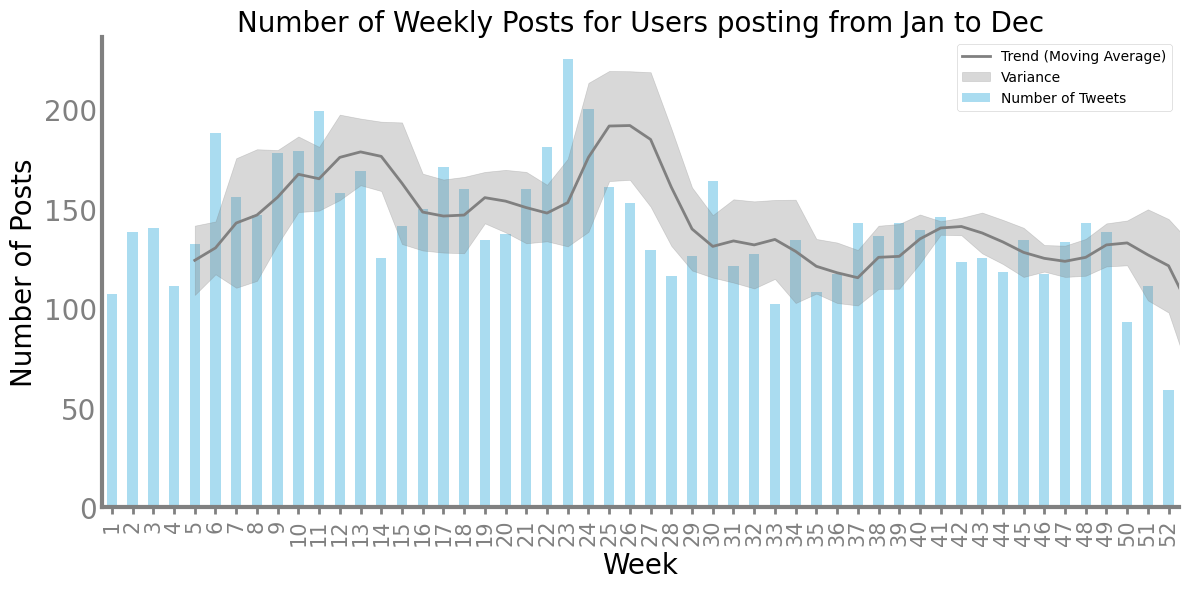

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is already defined and 'date' column is in datetime format
filtered_df['week'] = filtered_df['date'].dt.isocalendar().week
df_plot = filtered_df.groupby(['week']).size()

# Compute the moving average
window_size = 4  # You can change the window size to fit your needs
maverage = df_plot.rolling(window=window_size).mean()

# Compute the standard deviation
std_dev = df_plot.rolling(window=window_size).std()

# Plot the barplot
plt.figure(figsize=(12, 6))
df_plot.plot(kind='bar', color='skyblue', alpha=0.7, label='Number of Tweets')

# Plot the moving average trend line
plt.plot(maverage, color='grey', linewidth=2, label='Trend (Moving Average)')

# Plot the shaded area representing variance
plt.fill_between([i for i in range(1,53)], maverage-std_dev, maverage+std_dev, color='grey', alpha=0.3, label='Variance')

plt.title('Number of Weekly Posts for Users posting from Jan to Dec', fontsize=20)
plt.xlabel('Week')
plt.ylabel('Number of Posts')
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()



In [20]:
# Assuming 'df' is already defined and 'date' column is in datetime format
df_plot = filtered_df.groupby(['week', 'username']).size().reset_index().pivot(columns='username', index='week', values=0)
df_plot = df_plot.fillna(value=0)
sorted_usernames = filtered_df.username.value_counts().index.to_list()

In [21]:
print(sorted_usernames)

['Maersk', 'Schneiderelec', 'Gsk', 'Sap', 'Alstom', 'Arup', 'Novonordisk', 'Verbundag', 'Astrazeneca', 'Orsted', 'Ecocem', 'Bt Group', 'Centricaplc', 'Vestas', 'Dsmfirmenich', 'Edfofficiel', 'Johnsoncontrols', 'Abb News Group', 'Eonenergyuk', 'Danfoss', 'Nestle', 'Akzonobel', 'Danone', 'Volvocars', 'Rockwool Group', 'Enelenergia', 'Ikea']


26
Ikea
[0. 1. 0. 3. 0. 0. 4. 3. 1. 1. 1. 2. 1. 0. 2. 1. 0. 2. 1. 0. 0. 1. 2. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 2. 0. 3. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 0.]
25
Enelenergia
24
Rockwool Group
23
Volvocars
22
Danone
21
Akzonobel
20
Nestle
19
Danfoss
18
Eonenergyuk
17
Abb News Group
16
Johnsoncontrols
15
Edfofficiel
14
Dsmfirmenich
13
Vestas
12
Centricaplc
11
Bt Group
10
Ecocem
9
Orsted
8
Astrazeneca
7
Verbundag
6
Novonordisk
5
Arup
4
Alstom
3
Sap
2
Gsk
1
Schneiderelec
0
Maersk


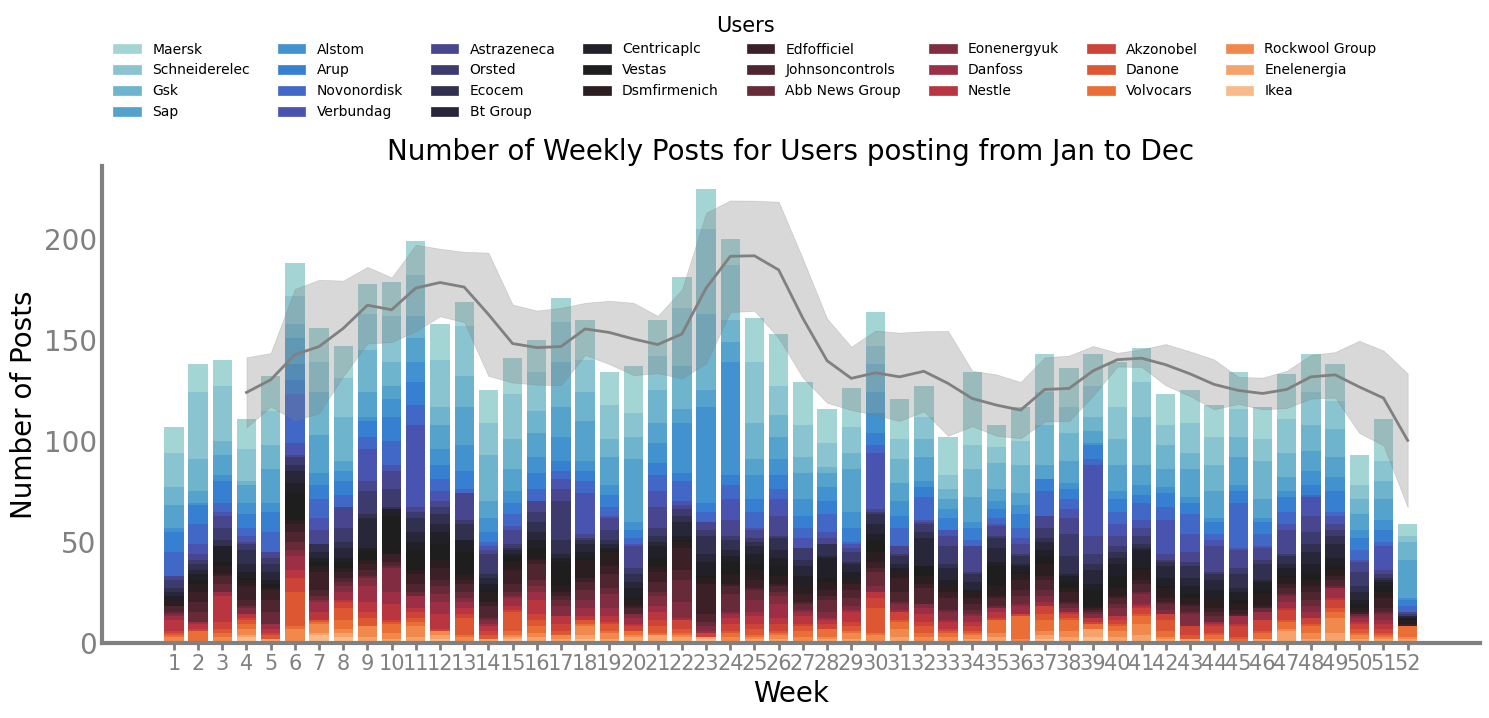

In [22]:
# Set the palette
palette = sns.color_palette("icefire", n_colors=len(filtered_df.username.unique()))
sns.set_palette(palette)

# Plotting
_, ax = plt.subplots(figsize=(15, 6))

# Plot Number of Tweets per Day
for i in range(len(sorted_usernames)-1, -1, -1):
    print(i)
    print(sorted_usernames[i])
    if i == 26:
        print(df_plot[sorted_usernames[i]].values)
        ax.bar(x = df_plot[sorted_usernames[i]].index, height = df_plot[sorted_usernames[i]].values, color=palette[i])
        bottom = df_plot[sorted_usernames[i]].values.copy()
    else:
        ax.bar(x = df_plot[sorted_usernames[i]].index, height = df_plot[sorted_usernames[i]].values, bottom = bottom, color=palette[i])
        bottom += df_plot[sorted_usernames[i]].values.copy()

plt.title('Number of Weekly Posts for Users posting from Jan to Dec', fontsize=20)
plt.xlabel('Week')
plt.ylabel('Number of Posts')
plt.xticks(ticks = [i+1 for i in range(52)], fontsize=15)
plt.yticks(fontsize=20)
plt.grid(False)

# Plot the moving average trend line
plt.plot(maverage, color='grey', linewidth=2, label='Trend (Moving Average)')

# Plot the shaded area representing variance
plt.fill_between([i for i in range(1,53)], maverage-std_dev, maverage+std_dev, color='grey', alpha=0.3, label='Variance')

# # Calculate the number of columns based on figure size and number of unique usernames
fig = plt.gcf()
fig_width = fig.get_size_inches()[0]  # Width of the figure in inches
max_legend_columns = int(fig_width // 2)  # Adjust the divisor to control column width
n_columns = min(len(sorted_usernames), max_legend_columns)

# # Adjust the subplot parameters to make room for the legend above the plot
plt.subplots_adjust(top=1.8)  # Increase top margin

handles = [Patch(color=palette[i], label=sorted_usernames[i]) for i in range(len(sorted_usernames))]
labels = sorted_usernames
# # Create the legend
fig.legend(labels = labels, handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=8, frameon=False, title = 'Users', title_fontsize=15)

plt.tight_layout()
plt.show()

#### Monthly trends

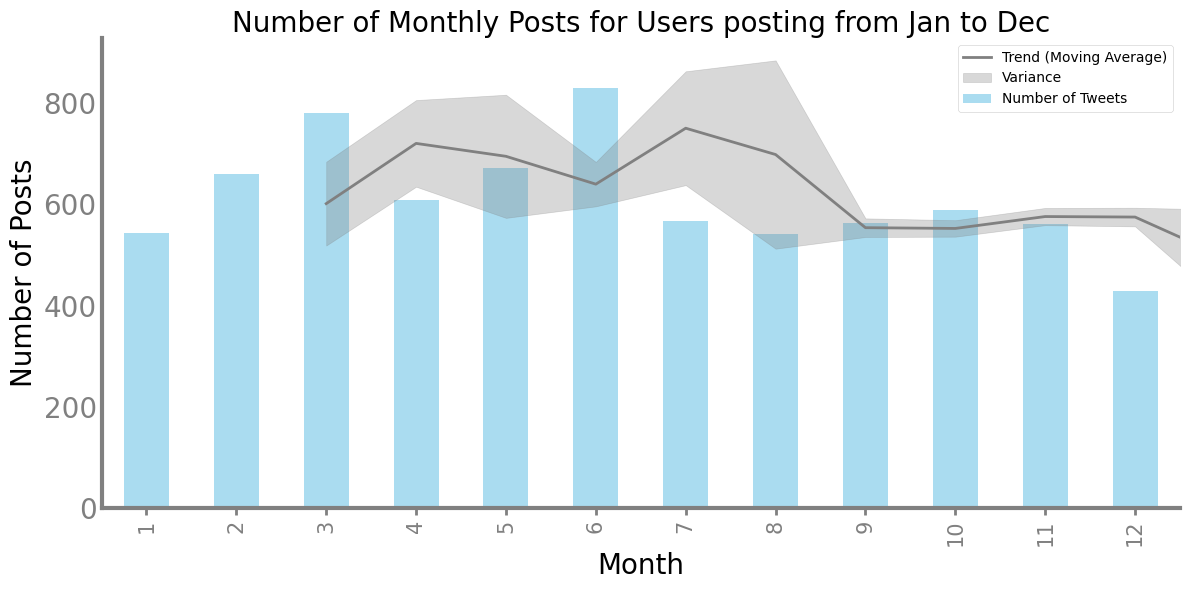

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is already defined and 'date' column is in datetime format
filtered_df['month'] = filtered_df['date'].dt.month
df_plot = filtered_df.groupby(['month']).size()

# Compute the moving average
window_size = 2  # You can change the window size to fit your needs
maverage = df_plot.rolling(window=window_size).mean()

# Compute the standard deviation
std_dev = df_plot.rolling(window=window_size).std()

# Plot the barplot
plt.figure(figsize=(12, 6))
df_plot.plot(kind='bar', color='skyblue', alpha=0.7, label='Number of Tweets')

# Plot the moving average trend line
plt.plot(maverage, color='grey', linewidth=2, label='Trend (Moving Average)')

# Plot the shaded area representing variance
plt.fill_between(df_plot.index.to_list(), maverage-std_dev, maverage+std_dev, color='grey', alpha=0.3, label='Variance')

plt.title('Number of Monthly Posts for Users posting from Jan to Dec', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()



In [24]:
# Assuming 'df' is already defined and 'date' column is in datetime format
df_plot = filtered_df.groupby(['month', 'username']).size().reset_index().pivot(columns='username', index='month', values=0)
df_plot = df_plot.fillna(value=0)
sorted_usernames = filtered_df.username.value_counts().index.to_list()

In [25]:
df_plot

username,Abb News Group,Akzonobel,Alstom,Arup,Astrazeneca,Bt Group,Centricaplc,Danfoss,Danone,Dsmfirmenich,...,Maersk,Nestle,Novonordisk,Orsted,Rockwool Group,Sap,Schneiderelec,Verbundag,Vestas,Volvocars
month,,,,,,,,,,,,,,,,,,,,,
1,13.0,6.0,12.0,41.0,14.0,9.0,17.0,6.0,7.0,15.0,...,61.0,22.0,34.0,16.0,7.0,42.0,100.0,10.0,6.0,10.0
2,13.0,12.0,23.0,31.0,20.0,31.0,10.0,18.0,27.0,8.0,...,67.0,13.0,47.0,19.0,15.0,55.0,62.0,18.0,21.0,6.0
3,10.0,9.0,41.0,43.0,31.0,10.0,20.0,28.0,12.0,10.0,...,71.0,22.0,35.0,22.0,14.0,44.0,101.0,59.0,51.0,7.0
4,9.0,9.0,33.0,23.0,20.0,11.0,10.0,9.0,16.0,13.0,...,64.0,16.0,18.0,36.0,5.0,57.0,81.0,9.0,21.0,5.0
5,12.0,7.0,33.0,24.0,31.0,13.0,16.0,15.0,9.0,24.0,...,84.0,10.0,27.0,14.0,9.0,79.0,74.0,30.0,8.0,6.0
6,27.0,12.0,140.0,23.0,26.0,20.0,20.0,12.0,6.0,18.0,...,88.0,9.0,27.0,10.0,5.0,39.0,129.0,21.0,15.0,4.0
7,21.0,12.0,33.0,26.0,6.0,16.0,22.0,4.0,16.0,16.0,...,79.0,15.0,23.0,12.0,11.0,55.0,53.0,38.0,8.0,9.0
8,3.0,9.0,21.0,25.0,27.0,29.0,8.0,8.0,6.0,17.0,...,93.0,12.0,21.0,15.0,12.0,40.0,44.0,5.0,11.0,12.0
9,11.0,8.0,7.0,26.0,29.0,16.0,12.0,8.0,4.0,12.0,...,73.0,3.0,28.0,23.0,6.0,30.0,58.0,42.0,20.0,25.0


In [26]:
print(sorted_usernames)

['Maersk', 'Schneiderelec', 'Gsk', 'Sap', 'Alstom', 'Arup', 'Novonordisk', 'Verbundag', 'Astrazeneca', 'Orsted', 'Ecocem', 'Bt Group', 'Centricaplc', 'Vestas', 'Dsmfirmenich', 'Edfofficiel', 'Johnsoncontrols', 'Abb News Group', 'Eonenergyuk', 'Danfoss', 'Nestle', 'Akzonobel', 'Danone', 'Volvocars', 'Rockwool Group', 'Enelenergia', 'Ikea']


26
Ikea
[4. 7. 6. 3. 3. 5. 0. 2. 5. 3. 2. 1.]
25
Enelenergia
24
Rockwool Group
23
Volvocars
22
Danone
21
Akzonobel
20
Nestle
19
Danfoss
18
Eonenergyuk
17
Abb News Group
16
Johnsoncontrols
15
Edfofficiel
14
Dsmfirmenich
13
Vestas
12
Centricaplc
11
Bt Group
10
Ecocem
9
Orsted
8
Astrazeneca
7
Verbundag
6
Novonordisk
5
Arup
4
Alstom
3
Sap
2
Gsk
1
Schneiderelec
0
Maersk


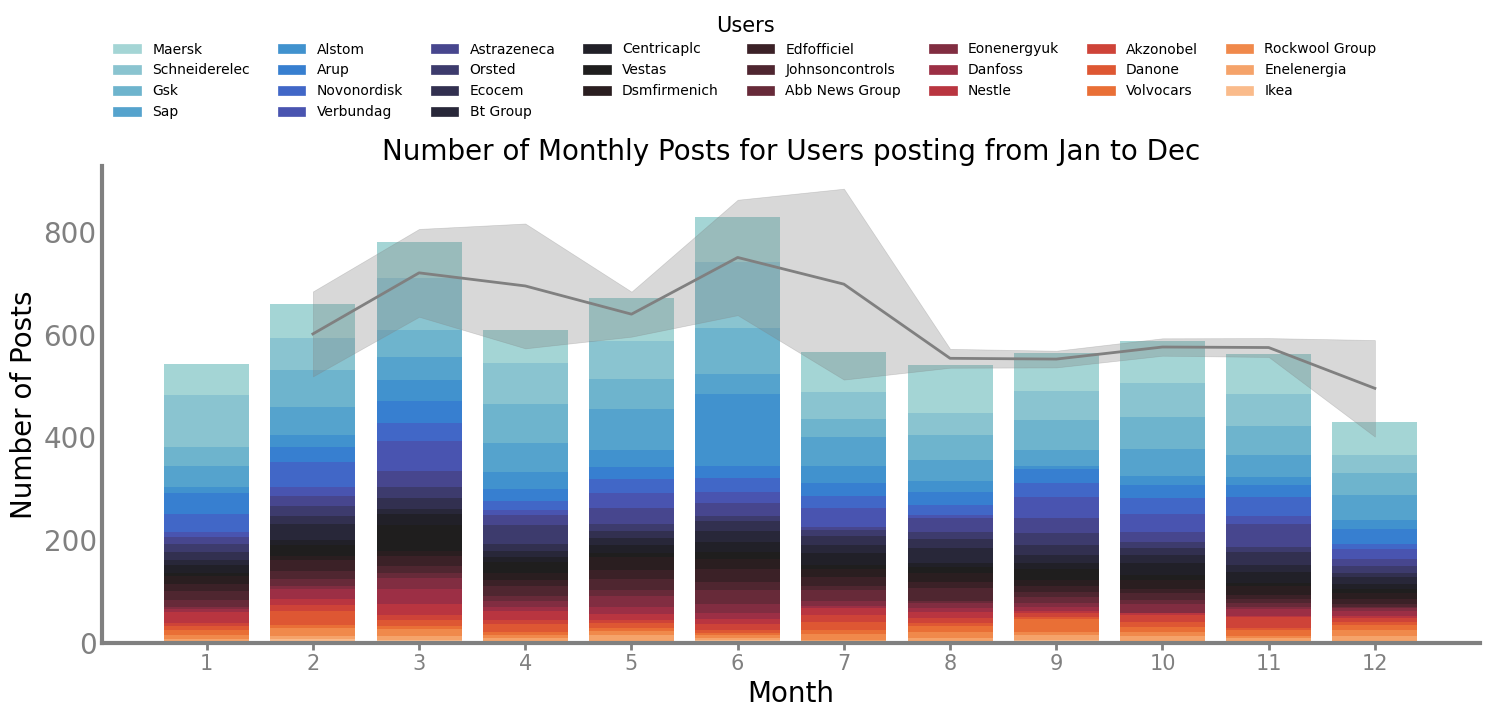

In [27]:
# Set the palette
palette = sns.color_palette("icefire", n_colors=len(filtered_df.username.unique()))
sns.set_palette(palette)

# Plotting
_, ax = plt.subplots(figsize=(15, 6))

# Plot Number of Tweets per Day
for i in range(len(sorted_usernames)-1, -1, -1):
    print(i)
    print(sorted_usernames[i])
    if i == 26:
        print(df_plot[sorted_usernames[i]].values)
        ax.bar(x = df_plot[sorted_usernames[i]].index, height = df_plot[sorted_usernames[i]].values, color=palette[i])
        bottom = df_plot[sorted_usernames[i]].values.copy()
    else:
        ax.bar(x = df_plot[sorted_usernames[i]].index, height = df_plot[sorted_usernames[i]].values, bottom = bottom, color=palette[i])
        bottom += df_plot[sorted_usernames[i]].values.copy()

plt.title('Number of Monthly Posts for Users posting from Jan to Dec', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(ticks = df_plot.index, fontsize=15)
plt.yticks(fontsize=20)
plt.grid(False)

# Plot the moving average trend line
plt.plot(maverage, color='grey', linewidth=2, label='Trend (Moving Average)')

# Plot the shaded area representing variance
plt.fill_between( df_plot.index, maverage-std_dev, maverage+std_dev, color='grey', alpha=0.3, label='Variance')

# # Calculate the number of columns based on figure size and number of unique usernames
fig = plt.gcf()
fig_width = fig.get_size_inches()[0]  # Width of the figure in inches
max_legend_columns = int(fig_width // 2)  # Adjust the divisor to control column width
n_columns = min(len(sorted_usernames), max_legend_columns)

# # Adjust the subplot parameters to make room for the legend above the plot
plt.subplots_adjust(top=1.8)  # Increase top margin

handles = [Patch(color=palette[i], label=sorted_usernames[i]) for i in range(len(sorted_usernames))]
labels = sorted_usernames
# # Create the legend
fig.legend(labels = labels, handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=8, frameon=False, title = 'Users', title_fontsize=15)

plt.tight_layout()
plt.show()

#### Text length analysis

In [85]:
import re
import string

In [86]:
texts_df.head()

,username,created_at,text,lang
0,Abb News Group,2023-01-03T15:18:41.000Z,New ABB E-mobility home charging solution helps drivers realize their sustainable mobility goals.\r\nRead more: https://t.co/SxPrbxo5DB\r\n\r\n#ABB #electricvehicles #emobility #sustainability https://t.co/aY28Cs6aQY,en
1,Abb News Group,2023-01-10T09:57:29.000Z,ABB #technology to facilitate #energyefficiency savings in Formula E. ⚡️🏎️\r\nABB Ability™ OPTIMAX® energy management #software to be fully implemented in Season 9.\r\nRead more: https://t.co/MwE3mzSgqT\r\n#ABBFormulaE #Motorsport https://t.co/cYRvPaNcPV,en
2,Abb News Group,2023-01-11T10:01:06.000Z,Better decisions for a greener data center! How #ABB energy solutions help Kangsheng keep the #data flowing 24/7: https://t.co/VFRVMz0Ni7\r\n#betterdecisions #ABB_Ability #sustainability #datacenter https://t.co/hKdzGiNxXB,en
3,Abb News Group,2023-01-12T09:09:45.000Z,"ABB Formula E Season 9 goes green in Mexico!\r\nThe new Gen3 era of the ABB FIA Formula E World Championship, with #ABB as Official Charging Partner, gets underway this weekend as the series returns to Mexico City for the 1st round of Season 9.⚡️🏎️\r\nRead more: https://t.co/qQhDnBjI4B https://t.co/vpnIxP0kB4",en
4,Abb News Group,2023-01-13T09:41:43.000Z,The #ABB Decoded #podcast with Frank Muehlon is out now! ABB E-mobility's CEO discusses #EV charging #technology development and the challenges of producing a charger for a highly pressured #motorsport environment such as #ABBFormulaE.\r\nListen today! 🎧👉 https://t.co/9rJWPJiYtI https://t.co/vLBWDJiHWm,en


In [87]:
# Function to clean tweets
def clean_text(t):              
    # Convert to lowercase
    text = t.lower()
        
    # Remove newlines, tabs, and extra whitespace
    text = text.replace('\n', ' ').replace('\t', ' ').replace('&amp;', '&').replace('&gt;', '')
    text = re.sub(r'\s+', ' ', text).strip()
    
    def remove_urls(text):
        # Define the regex pattern for URLs
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        # Use the sub method to replace URLs with an empty string
        cleaned_text = re.sub(url_pattern, '', text)
        return cleaned_text

    def remove_usernames(text):
        # Use a regular expression to find all @usernames at the beginning of the text
        cleaned_text = re.sub(r'^(@\w+\s*)+', '', text)
        return cleaned_text
    
    text = remove_urls(text)
    
    text = remove_usernames(text)
    
    return text

In [88]:
texts_df.text = texts_df.text.apply(lambda x: clean_text(x))
texts_df.head(3)

,username,created_at,text,lang
0,Abb News Group,2023-01-03T15:18:41.000Z,new abb e-mobility home charging solution helps drivers realize their sustainable mobility goals. read more: #abb #electricvehicles #emobility #sustainability,en
1,Abb News Group,2023-01-10T09:57:29.000Z,abb #technology to facilitate #energyefficiency savings in formula e. ⚡️🏎️ abb ability™ optimax® energy management #software to be fully implemented in season 9. read more: #abbformulae #motorsport,en
2,Abb News Group,2023-01-11T10:01:06.000Z,better decisions for a greener data center! how #abb energy solutions help kangsheng keep the #data flowing 24/7: #betterdecisions #abb_ability #sustainability #datacenter,en


In [89]:
# Calculate text lengths
texts_df['text_length'] = texts_df['text'].apply(len)

In [90]:
texts_df.head(3)

,username,created_at,text,lang,text_length
0,Abb News Group,2023-01-03T15:18:41.000Z,new abb e-mobility home charging solution helps drivers realize their sustainable mobility goals. read more: #abb #electricvehicles #emobility #sustainability,en,160
1,Abb News Group,2023-01-10T09:57:29.000Z,abb #technology to facilitate #energyefficiency savings in formula e. ⚡️🏎️ abb ability™ optimax® energy management #software to be fully implemented in season 9. read more: #abbformulae #motorsport,en,199
2,Abb News Group,2023-01-11T10:01:06.000Z,better decisions for a greener data center! how #abb energy solutions help kangsheng keep the #data flowing 24/7: #betterdecisions #abb_ability #sustainability #datacenter,en,173


In [91]:
import datetime

In [92]:
texts_df['date'] = pd.to_datetime(texts_df['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [93]:
weird_length = texts_df.loc[texts_df.text_length > 280]

In [94]:
weird_length

,username,created_at,text,lang,text_length,date
201,Acciona,2023-12-11T21:40:00.000Z,"estamos orgullosos de apoyar el programa @homewardbound16 y a las increíbles científicas que lo forman y están redefiniendo la narrativa del liderazgo mundial 👩‍🔬👷‍♀️el viaje de este año a la antártida ha terminado, pero como dice @fabiandattner: ""este es solo el fin del principio""",es,283,2023-12-11 21:40:00
299,Akzonobel,2023-07-31T12:00:08.000Z,"diners at burger king’s itaim bibi branch in são paolo, brazil, feel like they’re in #barbie: the movie thanks to a partnership with our tintas coral brand. the team created a special color range in honor of the beloved doll and gave the restaurant a stunning makeover. #akzonobel",en,281,2023-07-31 12:00:08
304,Akzonobel,2023-08-12T09:00:04.000Z,"bucky’s back! the denver broncos’ iconic fiberglass horse has received a much-needed facelift – with help from our paint experts and grip-gard brand. he’s now back on top of the scoreboard at the team’s colorado stadium, ready for the new nfl season. #nfl #broncos #broncoscountry",en,281,2023-08-12 09:00:04
308,Akzonobel,2023-08-30T09:00:02.000Z,proud to have signed an official partnership agreement with paleis het loo in the netherlands. we’ve been supplying our sikkens paint during the restoration of the royal building – which just had its grand re-opening. excited to continue offering our expertise.#akzonobel #sikkens,en,281,2023-08-30 09:00:02
323,Akzonobel,2023-10-20T09:00:03.000Z,"around 75 schools in parts of türkiye hit by february’s earthquakes will be renovated through a #letscolour project launched by our #marshall brand. located in hatay province, around 60,000 liters of paint will be used benefiting 8,000 students. #peopleplanetpaint #akzonobelcares",en,281,2023-10-20 09:00:03
369,Alstom,2023-01-31T08:51:52.000Z,"at alstom, we innovate to deliver operationally and make mobility smarter & greener within & beyond #thailand. that's why we're proud to partner with @frenthailande for the 2023 france-thailand year of innovation to nurture a culture of experimentation & #sustainable #innovation.",en,281,2023-01-31 08:51:52
639,Alstom,2023-06-30T14:12:46.000Z,"alstom is highlighting its vision to build a #lowcarbon & #smart transportation future at the 1st gba international rail transit forum & exhibition in guangzhou, china from june 29 - july 1. join us to explore our world's leading products & innovative technologies at booth 9t202.",en,281,2023-06-30 14:12:46
1084,Arup,2023-12-19T17:10:24.000Z,"city transport authorities need to keep growing numbers of people moving, while also trying to reduce carbon emissions. @willcavendishcb, our global digital services leader, spoke to reuters’ ethical corporation magazine about how ai can help make that happen. #transport #digital",en,281,2023-12-19 17:10:24
1115,Astrazeneca,2023-02-20T18:00:14.000Z,around 10-20% of men with advanced prostate cancer will develop castration-resistant prostate cancer within five years of diagnosis and the majority will unfortunately succumb to this aggressive disease within two to three years. know your risk factors – talk to your doctor #gu23,en,281,2023-02-20 18:00:14
1202,Astrazeneca,2023-05-26T15:06:03.000Z,"as active psci members, we’re proud of the sustainability achievements outlined in the 2022 #psciannualreport. together with our peers, we’re driving responsible supply chain practices, including supplier targets to cut scope 3 emissions and accelerating the switch to renewables.",en,281,2023-05-26 15:06:03


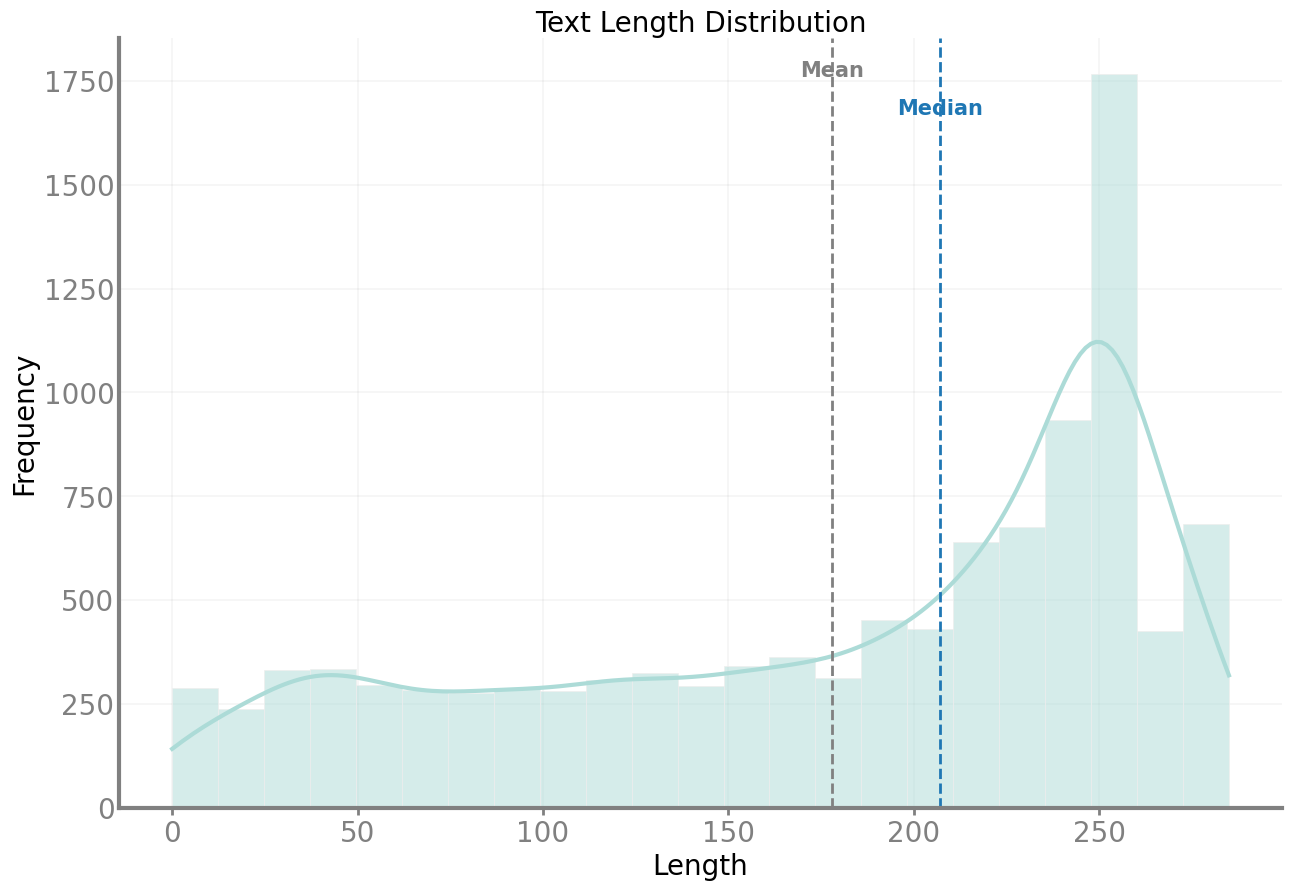

In [95]:
sns.set_palette("icefire", n_colors = len(texts_df.username.unique()))

mean_text_length = texts_df.text_length.mean()
median_text_length = texts_df.text_length.median()

_, ax = plt.subplots(figsize=(15, 10))

# Create the KDE plot without the legend
g = sns.histplot(data=texts_df, x="text_length", kde=True)
plt.axvline(mean_text_length, color='grey', linestyle='--', linewidth=2)
plt.axvline(median_text_length, color='tab:blue', linestyle='--', linewidth=2)

# Add text annotations for the mean and median
plt.text(mean_text_length, plt.gca().get_ylim()[1] * 0.95, 'Mean', color='grey', ha='center', fontsize=15, weight='bold')
plt.text(median_text_length, plt.gca().get_ylim()[1] * 0.9, 'Median', color='tab:blue', ha='center', fontsize=15, weight='bold')

# Set x and y tick labels font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Set x-axis label and its font size
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title("Text Length Distribution", fontsize=20)

# Show the plot
plt.show()


In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

In [97]:
# Get unique usernames
sorted_usernames = texts_df['username'].value_counts().index.to_list()
sorted_usernames

['Lego Group',
 'Maersk',
 'Schneiderelec',
 'Gsk',
 'Philips',
 'Sap',
 'Alstom',
 'Novonordisk',
 'Arup',
 'Verbundag',
 'Deutschepostdhl',
 'Astrazeneca',
 'Orsted',
 'Ecocem',
 'Unilever',
 'Bt Group',
 'Centricaplc',
 'Vestas',
 'Dsmfirmenich',
 'Edfofficiel',
 'Johnsoncontrols',
 'Abb News Group',
 'Eonenergyuk',
 'Danfoss',
 'Nestle',
 'Akzonobel',
 'Danone',
 'Volvocars',
 'Rockwool Group',
 'Iberdrola',
 'Sse',
 'Heineken',
 'Acciona',
 'Leaseplan',
 'Enelenergia',
 'Ikea',
 'Storaenso',
 'H&M',
 'Moethennessy',
 'Edprenewables']

In [98]:
texts_df.columns

Index(['username', 'created_at', 'text', 'lang', 'text_length', 'date'], dtype='object')

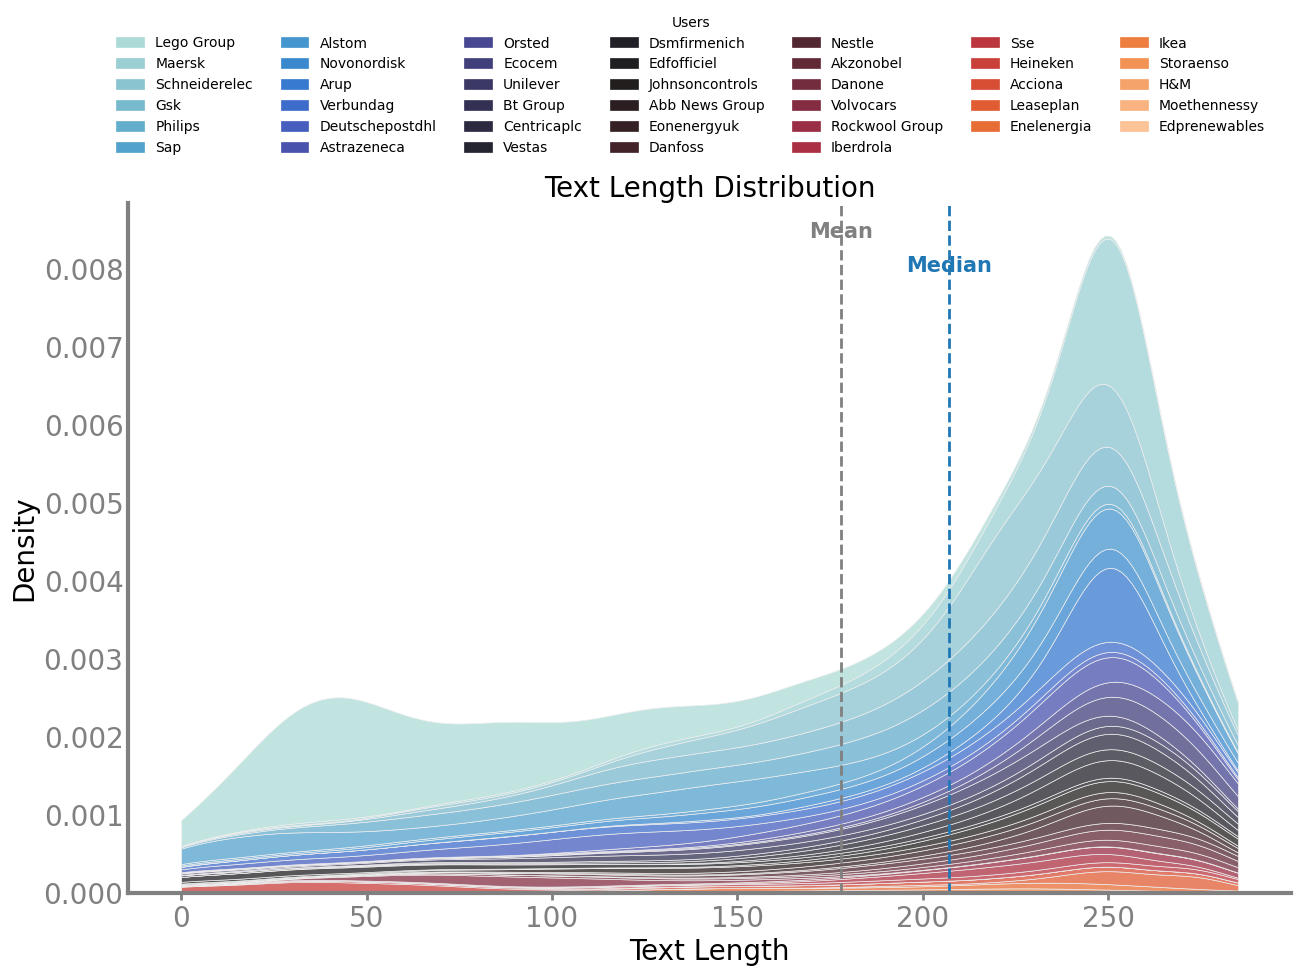

In [105]:
sns.set_palette("icefire", n_colors = len(texts_df.username.unique()))

# Set the palette
palette = sns.color_palette("icefire", n_colors=len(df.username.unique()))
sns.set_palette(palette)

_, ax = plt.subplots(figsize=(15, 10))

# Create the KDE plot without the legend
g = sns.kdeplot(data=texts_df, x="text_length", hue="username", hue_order=sorted_usernames, multiple="stack", legend=False, cut=0)

plt.axvline(mean_text_length, color='grey', linestyle='--', linewidth=2)
plt.axvline(median_text_length, color='tab:blue', linestyle='--', linewidth=2)

# Add text annotations for the mean and median
plt.text(mean_text_length, plt.gca().get_ylim()[1] * 0.95, 'Mean', color='grey', ha='center', fontsize=15, weight='bold')
plt.text(median_text_length, plt.gca().get_ylim()[1] * 0.9, 'Median', color='tab:blue', ha='center', fontsize=15, weight='bold')



# Create custom legend handles
handles = [Patch(color=palette[i], label=sorted_usernames[i]) for i in range(len(sorted_usernames))]

# Calculate the number of columns based on figure size and number of unique usernames
fig = plt.gcf()
fig_width = fig.get_size_inches()[0]  # Width of the figure in inches
max_legend_columns = int(fig_width // 2)  # Adjust the divisor to control column width
n_columns = min(len(sorted_usernames), max_legend_columns)

# Adjust the subplot parameters to make room for the legend above the plot
plt.subplots_adjust(top=0.8)  # Increase top margin

# Create the legend
fig.legend(labels = sorted_usernames, handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=n_columns, frameon=False, title='Users')

# Set x and y tick labels font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Text Length', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.title('Text Length Distribution', fontsize=20)
plt.grid(False)
# Show the plot
plt.show()


I think that a lot of short texts are replies, so I will try to perform again the analysis I did before but without replies

In [112]:
def remove_replies(df, column_name='text'):
    # Use boolean indexing to filter out rows where the text starts with "@"
    filtered_df = df[~df[column_name].str.startswith('@')]
    return filtered_df

tmp = remove_replies(df)

In [114]:
len(tmp)

6938

In [115]:
# Function to clean tweets
def clean_text(t):              
    # Convert to lowercase
    text = t.lower()
        
    # Remove newlines, tabs, and extra whitespace
    text = text.replace('\n', ' ').replace('\t', ' ').replace('&amp;', '&').replace('&gt;', '')
    text = re.sub(r'\s+', ' ', text).strip()
    
    def remove_urls(text):
        # Define the regex pattern for URLs
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        # Use the sub method to replace URLs with an empty string
        cleaned_text = re.sub(url_pattern, '', text)
        return cleaned_text
    
    text = remove_urls(text)
    
    return text

In [116]:
tmp.text = tmp.text.apply(lambda x: clean_text(x))
tmp.head(3)

,attachments,author_id,created_at,edit_history_tweet_ids,entities,id,lang,public_metrics,text,username,...,annotations_probability,annotations_start,annotations_type,urls_display_url,urls_end,urls_expanded_url,urls_start,urls_status,urls_unwound_url,urls_url
0,{'media_keys': ['13_1610292861630840833']},51801586,2023-01-03T15:18:41.000Z,['1610294585242300416'],"{'annotations': [{'end': 6, 'normalized_text': 'ABB', 'probability': 0.5031, 'start': 4, 'type': 'Other'}, {'end': 137, 'normalized_text': 'ABB', 'probability': 0.563, 'start': 135, 'type': 'Other'}], 'hashtags': [{'end': 138, 'start': 134, 'tag': 'ABB'}, {'end': 156, 'start': 139, 'tag': 'electricvehicles'}, {'end': 167, 'start': 157, 'tag': 'emobility'}, {'end': 183, 'start': 168, 'tag': 'sustainability'}], 'urls': [{'display_url': 'social.abb/e-mobility-hom…', 'end': 132, 'expanded_url': 'https://social.abb/e-mobility-home-charging-solution', 'start': 109, 'url': 'https://t.co/SxPrbxo5DB'}, {'display_url': 'pic.twitter.com/aY28Cs6aQY', 'end': 207, 'expanded_url': 'https://twitter.com/ABBgroupnews/status/1610294585242300416/video/1', 'media_key': '13_1610292861630840833', 'start': 184, 'url': 'https://t.co/aY28Cs6aQY'}]}",1610294585242300416,en,"{'bookmark_count': 0, 'impression_count': 3864, 'like_count': 19, 'quote_count': 2, 'reply_count': 0, 'retweet_count': 7}",new abb e-mobility home charging solution helps drivers realize their sustainable mobility goals. read more: #abb #electricvehicles #emobility #sustainability,Abb News Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'media_keys': ['3_1612750081463095296']},51801586,2023-01-10T09:57:29.000Z,['1612750467859378178'],"{'annotations': [{'end': 2, 'normalized_text': 'ABB', 'probability': 0.6395, 'start': 0, 'type': 'Other'}, {'end': 67, 'normalized_text': 'Formula E', 'probability': 0.6289, 'start': 59, 'type': 'Other'}, {'end': 86, 'normalized_text': 'ABB Ability™', 'probability': 0.7036, 'start': 75, 'type': 'Other'}, {'end': 95, 'normalized_text': 'OPTIMAX®', 'probability': 0.6324, 'start': 88, 'type': 'Other'}, {'end': 208, 'normalized_text': 'ABBFormulaE', 'probability': 0.7369, 'start': 198, 'type': 'Other'}, {'end': 220, 'normalized_text': 'Motorsport', 'probability': 0.6179, 'start': 211, 'type': 'Other'}], 'hashtags': [{'end': 15, 'start': 4, 'tag': 'technology'}, {'end': 47, 'start': 30, 'tag': 'energyefficiency'}, {'end': 124, 'start': 115, 'tag': 'software'}, {'end': 209, 'start': 197, 'tag': 'ABBFormulaE'}, {'end': 221, 'start': 210, 'tag': 'Motorsport'}], 'urls': [{'display_url': 'social.abb/technology-ene…', 'end': 196, 'expanded_url': 'https://social.abb/technology-energy-efficiency-formula-e', 'start': 173, 'url': 'https://t.co/MwE3mzSgqT'}, {'display_url': 'pic.twitter.com/cYRvPaNcPV', 'end': 245, 'expanded_url': 'https://twitter.com/ABBgroupnews/status/1612750467859378178/photo/1', 'media_key': '3_1612750081463095296', 'start': 222, 'url': 'https://t.co/cYRvPaNcPV'}]}",1612750467859378178,en,"{'bookmark_count': 0, 'impression_count': 4887, 'like_count': 11, 'quote_count': 2, 'reply_count': 0, 'retweet_count': 4}",abb #technology to facilitate #energyefficiency savings in formula e. ⚡️🏎️ abb ability™ optimax® energy management #software to be fully implemented in season 9. read more: #abbformulae #motorsport,Abb News Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'media_keys': ['13_1613112174939103235']},51801586,2023-01-11T10:01:06.000Z,['1613113765595320321'],"{'annotations': [{'end': 51, 'normalized_text': 'ABB', 'probability': 0.6157, 'start': 49, 'type': 'Other'}, {'end': 83, 'normalized_text': 'Kangsheng', 'probability': 0.4403, 'start': 75, 'type': 'Other'}, {'end': 166, 'normalized_text': 'ABB_Ability', 'probability': 0.752, 'start': 156, 'type': 'Other'}], 'hashtags': [{'end': 52, 'start': 48, 'tag': 'ABB'}, {'end': 99, 'start': 94, 'tag': 'data'}, {'end': 154, 'start': 138, 'tag': 'betterdecisions'}, {'end': 167, 'start': 155, 'tag': 'ABB_Ability'}, {'end': 183, 'start': 168

In [117]:
# Calculate text lengths
tmp['text_length'] = tmp['text'].apply(len)

In [118]:
tmp.head(3)

,attachments,author_id,created_at,edit_history_tweet_ids,entities,id,lang,public_metrics,text,username,...,annotations_start,annotations_type,urls_display_url,urls_end,urls_expanded_url,urls_start,urls_status,urls_unwound_url,urls_url,text_length
0,{'media_keys': ['13_1610292861630840833']},51801586,2023-01-03T15:18:41.000Z,['1610294585242300416'],"{'annotations': [{'end': 6, 'normalized_text': 'ABB', 'probability': 0.5031, 'start': 4, 'type': 'Other'}, {'end': 137, 'normalized_text': 'ABB', 'probability': 0.563, 'start': 135, 'type': 'Other'}], 'hashtags': [{'end': 138, 'start': 134, 'tag': 'ABB'}, {'end': 156, 'start': 139, 'tag': 'electricvehicles'}, {'end': 167, 'start': 157, 'tag': 'emobility'}, {'end': 183, 'start': 168, 'tag': 'sustainability'}], 'urls': [{'display_url': 'social.abb/e-mobility-hom…', 'end': 132, 'expanded_url': 'https://social.abb/e-mobility-home-charging-solution', 'start': 109, 'url': 'https://t.co/SxPrbxo5DB'}, {'display_url': 'pic.twitter.com/aY28Cs6aQY', 'end': 207, 'expanded_url': 'https://twitter.com/ABBgroupnews/status/1610294585242300416/video/1', 'media_key': '13_1610292861630840833', 'start': 184, 'url': 'https://t.co/aY28Cs6aQY'}]}",1610294585242300416,en,"{'bookmark_count': 0, 'impression_count': 3864, 'like_count': 19, 'quote_count': 2, 'reply_count': 0, 'retweet_count': 7}",new abb e-mobility home charging solution helps drivers realize their sustainable mobility goals. read more: #abb #electricvehicles #emobility #sustainability,Abb News Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160
1,{'media_keys': ['3_1612750081463095296']},51801586,2023-01-10T09:57:29.000Z,['1612750467859378178'],"{'annotations': [{'end': 2, 'normalized_text': 'ABB', 'probability': 0.6395, 'start': 0, 'type': 'Other'}, {'end': 67, 'normalized_text': 'Formula E', 'probability': 0.6289, 'start': 59, 'type': 'Other'}, {'end': 86, 'normalized_text': 'ABB Ability™', 'probability': 0.7036, 'start': 75, 'type': 'Other'}, {'end': 95, 'normalized_text': 'OPTIMAX®', 'probability': 0.6324, 'start': 88, 'type': 'Other'}, {'end': 208, 'normalized_text': 'ABBFormulaE', 'probability': 0.7369, 'start': 198, 'type': 'Other'}, {'end': 220, 'normalized_text': 'Motorsport', 'probability': 0.6179, 'start': 211, 'type': 'Other'}], 'hashtags': [{'end': 15, 'start': 4, 'tag': 'technology'}, {'end': 47, 'start': 30, 'tag': 'energyefficiency'}, {'end': 124, 'start': 115, 'tag': 'software'}, {'end': 209, 'start': 197, 'tag': 'ABBFormulaE'}, {'end': 221, 'start': 210, 'tag': 'Motorsport'}], 'urls': [{'display_url': 'social.abb/technology-ene…', 'end': 196, 'expanded_url': 'https://social.abb/technology-energy-efficiency-formula-e', 'start': 173, 'url': 'https://t.co/MwE3mzSgqT'}, {'display_url': 'pic.twitter.com/cYRvPaNcPV', 'end': 245, 'expanded_url': 'https://twitter.com/ABBgroupnews/status/1612750467859378178/photo/1', 'media_key': '3_1612750081463095296', 'start': 222, 'url': 'https://t.co/cYRvPaNcPV'}]}",1612750467859378178,en,"{'bookmark_count': 0, 'impression_count': 4887, 'like_count': 11, 'quote_count': 2, 'reply_count': 0, 'retweet_count': 4}",abb #technology to facilitate #energyefficiency savings in formula e. ⚡️🏎️ abb ability™ optimax® energy management #software to be fully implemented in season 9. read more: #abbformulae #motorsport,Abb News Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199
2,{'media_keys': ['13_1613112174939103235']},51801586,2023-01-11T10:01:06.000Z,['1613113765595320321'],"{'annotations': [{'end': 51, 'normalized_text': 'ABB', 'probability': 0.6157, 'start': 49, 'type': 'Other'}, {'end': 83, 'normalized_text': 'Kangsheng', 'probability': 0.4403, 'start': 75, 'type': 'Other'}, {'end': 166, 'normalized_text': 'ABB_Ability', 'probability': 0.752, 'start': 156, 'type': 'Other'}], 'hashtags': [{'end': 52, 'start': 48, 'tag': 'ABB'}, {'end': 99, 'start': 94, 'tag': 'data'}, {'end': 154, 'start': 138, 'tag': 'betterdecisions'}, {'end': 167, 'start': 155, 'tag': 'ABB_Ability'}, {'end': 183, 'start': 168, 'tag': 'su

In [119]:
import datetime

In [120]:
tmp['date'] = pd.to_datetime(tmp['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')

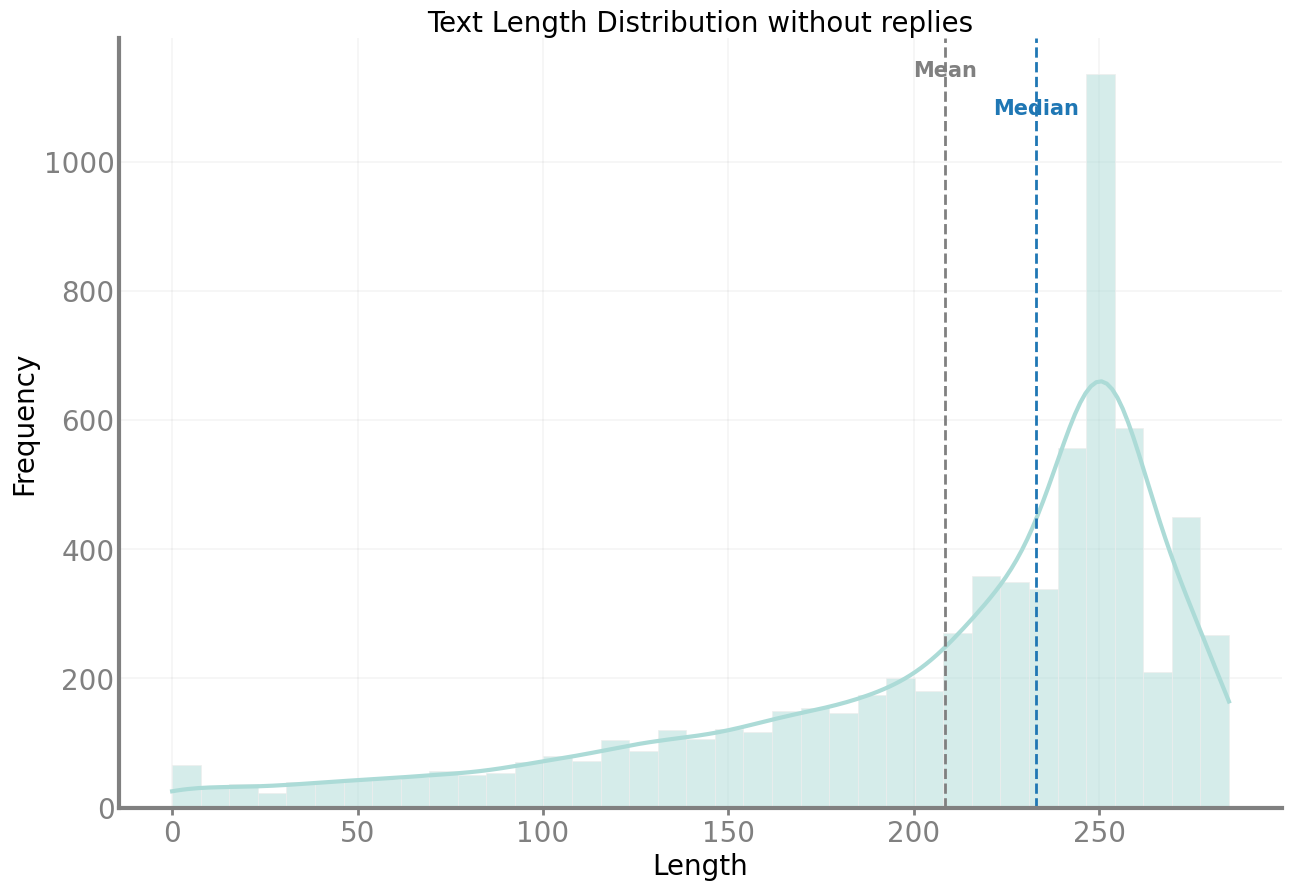

In [124]:
sns.set_palette("icefire", n_colors = len(tmp.username.unique()))

mean_text_length = tmp.text_length.mean()
median_text_length = tmp.text_length.median()

_, ax = plt.subplots(figsize=(15, 10))

# Create the KDE plot without the legend
g = sns.histplot(data=tmp, x="text_length", kde=True)
plt.axvline(mean_text_length, color='grey', linestyle='--', linewidth=2)
plt.axvline(median_text_length, color='tab:blue', linestyle='--', linewidth=2)

# Add text annotations for the mean and median
plt.text(mean_text_length, plt.gca().get_ylim()[1] * 0.95, 'Mean', color='grey', ha='center', fontsize=15, weight='bold')
plt.text(median_text_length, plt.gca().get_ylim()[1] * 0.9, 'Median', color='tab:blue', ha='center', fontsize=15, weight='bold')

# Set x and y tick labels font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Set x-axis label and its font size
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title("Text Length Distribution without replies", fontsize=20)

# Show the plot
plt.show()


In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

In [126]:
# Get unique usernames
sorted_usernames = texts_df['username'].value_counts().index.to_list()
sorted_usernames

['Lego Group',
 'Maersk',
 'Schneiderelec',
 'Gsk',
 'Philips',
 'Sap',
 'Alstom',
 'Novonordisk',
 'Arup',
 'Verbundag',
 'Deutschepostdhl',
 'Astrazeneca',
 'Orsted',
 'Ecocem',
 'Unilever',
 'Bt Group',
 'Centricaplc',
 'Vestas',
 'Dsmfirmenich',
 'Edfofficiel',
 'Johnsoncontrols',
 'Abb News Group',
 'Eonenergyuk',
 'Danfoss',
 'Nestle',
 'Akzonobel',
 'Danone',
 'Volvocars',
 'Rockwool Group',
 'Iberdrola',
 'Sse',
 'Heineken',
 'Acciona',
 'Leaseplan',
 'Enelenergia',
 'Ikea',
 'Storaenso',
 'H&M',
 'Moethennessy',
 'Edprenewables']

In [127]:
texts_df.columns

Index(['username', 'created_at', 'text', 'lang', 'text_length', 'date'], dtype='object')

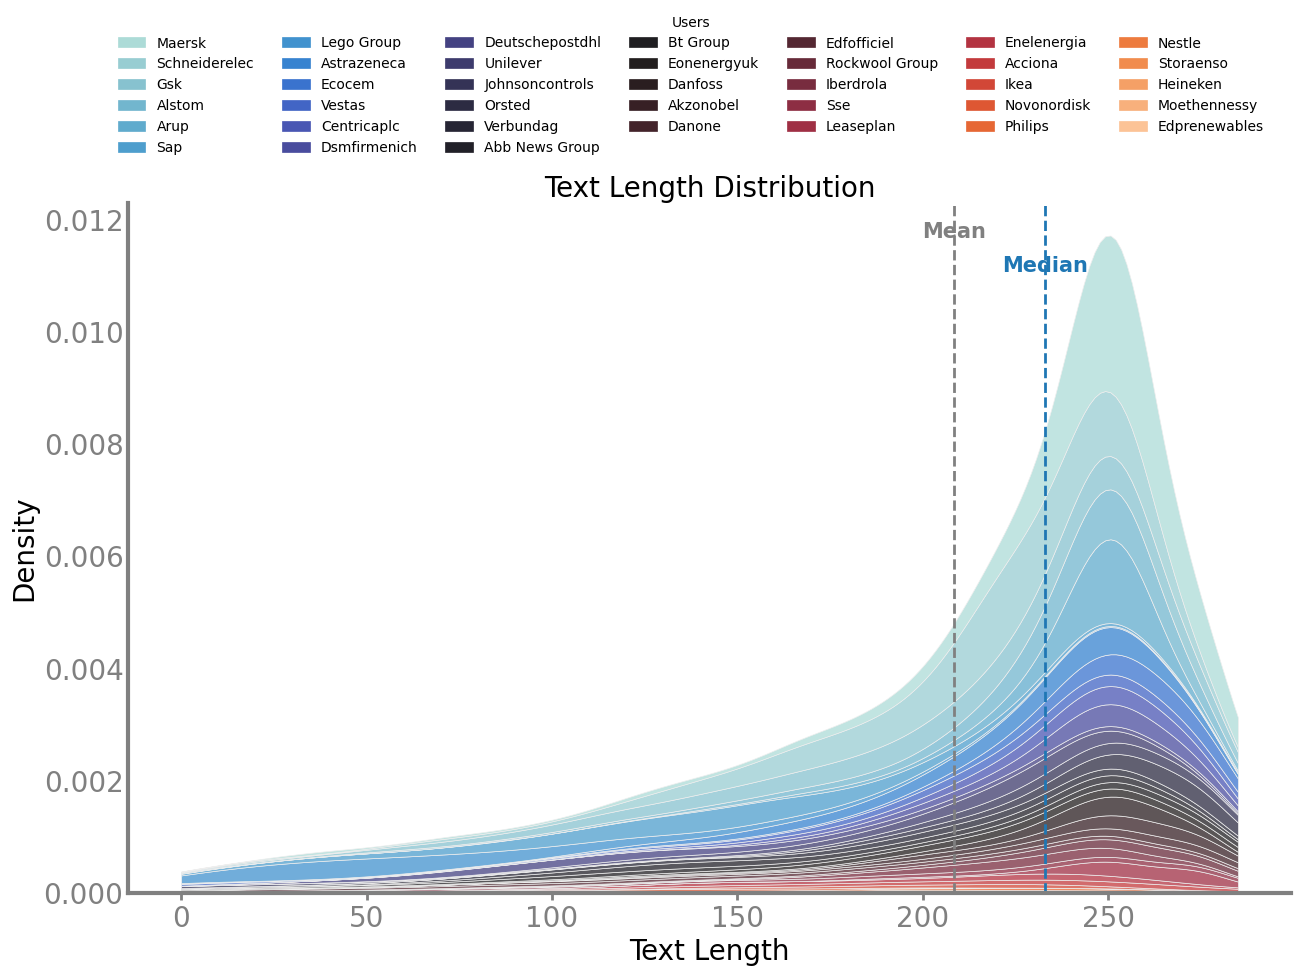

In [129]:
sns.set_palette("icefire", n_colors = len(tmp.username.unique()))

# Set the palette
palette = sns.color_palette("icefire", n_colors=len(tmp.username.unique()))
sns.set_palette(palette)

sorted_usernames = tmp.username.value_counts().index.to_list()

_, ax = plt.subplots(figsize=(15, 10))

# Create the KDE plot without the legend
g = sns.kdeplot(data=tmp, x="text_length", hue="username", hue_order=sorted_usernames, multiple="stack", legend=False, cut=0)

plt.axvline(mean_text_length, color='grey', linestyle='--', linewidth=2)
plt.axvline(median_text_length, color='tab:blue', linestyle='--', linewidth=2)

# Add text annotations for the mean and median
plt.text(mean_text_length, plt.gca().get_ylim()[1] * 0.95, 'Mean', color='grey', ha='center', fontsize=15, weight='bold')
plt.text(median_text_length, plt.gca().get_ylim()[1] * 0.9, 'Median', color='tab:blue', ha='center', fontsize=15, weight='bold')



# Create custom legend handles
handles = [Patch(color=palette[i], label=sorted_usernames[i]) for i in range(len(sorted_usernames))]

# Calculate the number of columns based on figure size and number of unique usernames
fig = plt.gcf()
fig_width = fig.get_size_inches()[0]  # Width of the figure in inches
max_legend_columns = int(fig_width // 2)  # Adjust the divisor to control column width
n_columns = min(len(sorted_usernames), max_legend_columns)

# Adjust the subplot parameters to make room for the legend above the plot
plt.subplots_adjust(top=0.8)  # Increase top margin

# Create the legend
fig.legend(labels = sorted_usernames, handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=n_columns, frameon=False, title='Users')

# Set x and y tick labels font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Text Length', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.title('Text Length Distribution', fontsize=20)
plt.grid(False)
# Show the plot
plt.show()
